In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from walkingAnt import *

In [2]:
landscape = multivariate_normal(mean=[0, 0], cov=[[2, 0], [0, 1]])

In [3]:
x, y = np.mgrid[-3:3.01:.01, -3:3.01:.01]
pos = np.dstack((x, y))

(-3.0, 3.0, -3.0, 3.0)

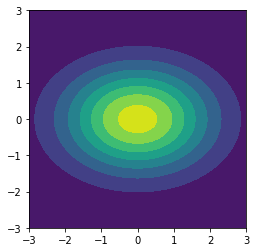

In [4]:
plt.contourf(x, y, landscape.pdf(pos))
plt.axis('square')

In [5]:
x0 = np.random.randint(2) * 5 - 2.5
y0 = np.random.rand() * 5 - 2.5
x1, y1 = x0 +.1, y0 +.1

duration = 100
xt, yt = np.zeros(duration), np.zeros(duration)
change = []
potential = []
for t in range(duration):
    xt[t], yt[t] = x1, y1
    p0, p1 = [landscape.pdf(xy) for xy in ([x0, y0], [x1, y1])]
    s = ant_step([x1, y1], [x0, y0], p0, p1)
    x0, y0 = x1, y1
    x1 += s[0]
    y1 += s[1]

-0.03678156379609234 -0.05214720699535938


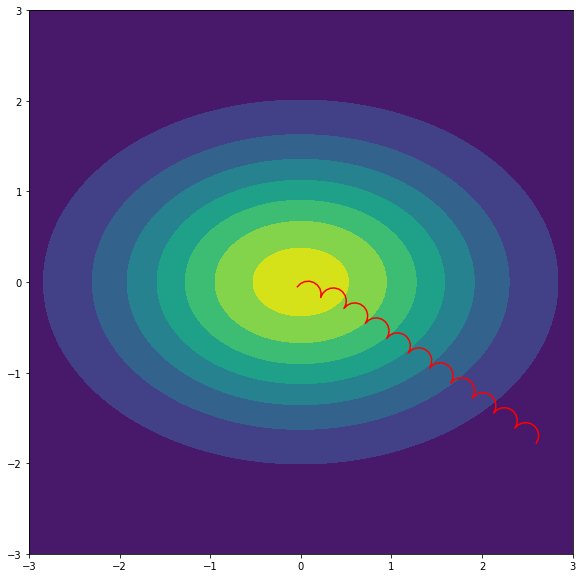

In [6]:
plt.figure(figsize=(10,10))
plt.contourf(x, y, landscape.pdf(pos))
plt.plot(xt, yt, c='r')
plt.axis('square')
print(x0, y0)